In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
school=pd.read_csv('stud_math.xls')

In [3]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как мы видим из анализа методом .info(), по содержанию имеется 13 столбцов с числовыми данными, и 17 строковых столбцов. 

In [4]:
school


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


При анализе датасета выясняется, что в нем присутствует отдельный столбец studytime,granular пока ещё неизвестного назначения. По визуальному анализу можно предположить, что данный столбец линейно связан со столбцом studytime. Попробуем это подтвердить:

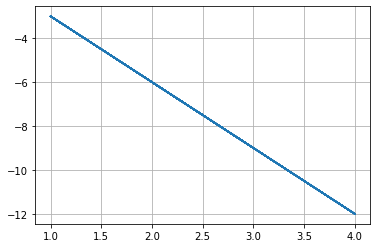

In [5]:
plt.plot(school['studytime'],school['studytime, granular'])
plt.grid()

Из рассмотрения графика в блоке [5] можно увидеть, что, действительно, столбцы являются линейно зависимыми, и использовать можно тот из них, который будет более удобным в финальном варианте.

Далее обратим внимание на тот факт, что в блоке [3] каждый столбец кроме школы, возраста, пола учащегося содержит пустые значения. Посмотрим, как именно они распределены в датасете:

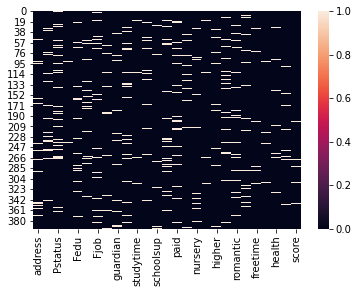

In [6]:
sns.heatmap(school[school.columns[3:]].isnull())
sns.color_palette("crest", as_cmap=True)

Пустые значения есть, но их относительно немного (не более 15% для любого из столбцов) и распределены они более-менее равномерно. Заполнять их определенным значением на данный момент не будем, так как это может (пусть и не очень сильно), исказить статистические данные.

Построим корреляционную карту для столбцов численного типа:

<AxesSubplot:>

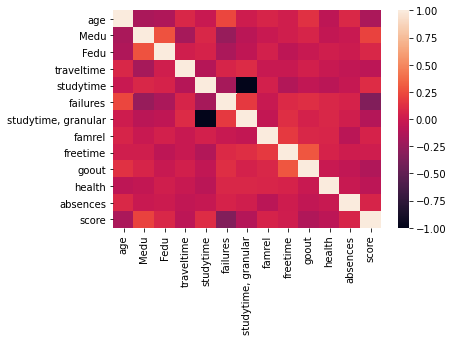

In [7]:
sns.heatmap(school.corr())

Как мы видим, столбцы studytime и studytime, granular действительно линейно зависимы друг от друга- их коэффициент корреляции равен -1. Более подробные данные корреляционного анализа получим позже, после обработки столбцов и описания каждого из них.

Проанализируем данные по столбцам и проведем их первичную обработку.


In [8]:
def filter_col(column, value_set):
#Фильтрация значений числовых колонок с ограниченными вариантами ответов
   school[column] = school[column].apply(lambda x: None if x not in value_set else x)
    
    
def clean(column):
    school[column] = school[column].apply(lambda x: None if pd.isnull(x) else None if 
                                          x == 'nan' else x)
def stat_data(column):
# Расчет и вывод среднего, медианы, границ квантилей, межквантильного размаха, поиск выбросов.
    mean_val = school[column].mean()
    median_val = school[column].median()
    IQR = school[column].quantile(0.75) - school[column].quantile(0.25)
    perc25 = school[column].quantile(0.25)
    perc75 = school[column].quantile(0.75)
 
    print(
    'Среднее значение: {},'.format(round(mean_val,2)),
    'Медианное значение: {},'.format(median_val),
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
    school[column].loc[school[column].between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins = 16, label = 'IQR')
    
def disc_data(column):
#Аналог stat_data для случайных величин с малым диапазоном вариантов
    mean_val = school[column].mean()
    median_val = school[column].median()
    IQR = school[column].quantile(0.75) - school[column].quantile(0.25)
    perc25 = school[column].quantile(0.25)
    perc75 = school[column].quantile(0.75)
    
    print(
    'Среднее значение: {},'.format(round(mean_val,2)),
    'Медианное значение: {},'.format(median_val),
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR))
 
    school[column].loc[school[column].between(
    col_dict[column][0],
    col_dict[column][-1])].hist(bins = len(col_dict[column]), label = 'IQR')
    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (2*(school[column].nunique()), 4))
    sns.boxplot(x=column, y='score', 
                data=school.loc[school.loc[:, column].isin(school.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = school.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(school.loc[school.loc[:, column] == comb[0], 'score'], 
                        school.loc[school.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [9]:
col_dict={'age':[15,16,17,18,19,20,21,22],
         'Medu':[0,1,2,3,4],
         'Fedu':[0,1,2,3,4],
         'traveltime':[1,2,3,4],
         'studytime':[1,2,3,4],
          'studytime, granular':[-3,-6,-9,-12],
         'failures':[0,1,2,3],
         'famrel':[1,2,3,4,5],
         'freetime':[1,2,3,4,5],
         'goout':[1,2,3,4,5],
         'health':[1,2,3,4,5],
         'sex':['M','F'],
         'address':['U','R'],
         'famsize':['LE3','GT3'],
          'Pstatus':['T','A'],
          'Mjob':['teacher','health','services','at_home','other'],
         'Fjob':['teacher','health','services','at_home','other'],
         'reason':['home','reputation','course','other'],
         'guardian':['mother','father','other'],
         'schoolsup':['yes','no'],
         'famsup':['yes','no'],
         'paid':['yes','no'],
         'activities':['yes','no'],
         'nursery':['yes','no'],
         'higher':['yes','no'],
         'internet':['yes','no'],
         'romantic':['yes','no'],
         }

In [10]:
for col in school.columns:
    if col not in ['absences','score','school']:
        filter_col(col, col_dict[col])

In [11]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 370 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как видно из повторного анализа датафрейма, изменилось количество ненулевых элементов в столбцах Fedu и famrel- данные, лежащие вне заданных вариантов, не будут учитываться. (Хотя, с другой стороны, можно было бы попытаться исправить соответствующие значения и угадать, что именно имелось в виду в каждом из случаев). Все остальные значения столбцов, возможная область значений которых известна заранее, остались без изменений, что позволяет сделать вывод о хорошем качестве данного датасета. 

Несмотря на то, что в самом датасете присутутствует 13 числовых столбцов, большая часть из них представляют собой дискретные случайные величины, возможные значения которых достаточно ограничены и известны заранее, устранение потенциальных ошибок в записи столбцов было выполнено на предыдущем шаге.

Столбец, содержащие информацию о посещаемости студентами занятий, а также столбец с финальными результатами необходимо подвергнуть дополнительной обработке:

Обработка столбца посещаемости:

Среднее значение: 7.28, Медианное значение: 4.0, 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


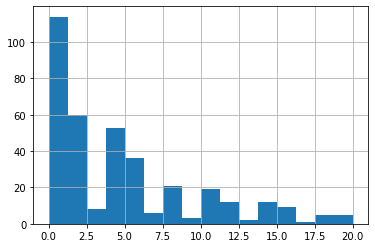

In [12]:
stat_data('absences')

Как мы видим, в медианное значение количества пропусков составляет четыре. Не совсем понятно, за какой именно период времени считаются пропуски, и сколько занятий к тому моменту прошло, поэтому отбор с точки зрения "здравого смысла" может быть и не применим. Тем не менее, средее значение лежит далеко от медианы, что указывает на потенциальное наличие выбросов. Проверим это:

In [13]:
school.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Действительно, среди значений пропусков присутствует два потенциальных выброса: 212 и 385, оба по одному разу. Не совсем очевидно, стоит ли их просто так отбросить.

Среднее значение: 52.26, Медианное значение: 55.0, 25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


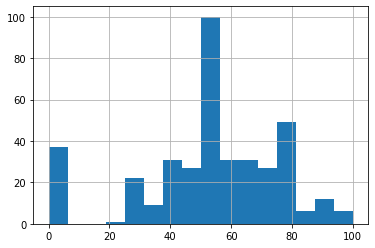

In [14]:
stat_data('score')

Анализ данных по оценкам за государственный экзамен показывает, что система оценивания подобрана достаточно хорошо (половина студентов получают оценки больше 55 баллов, и 25% -- выше 70). Границы выбросов при этом являются несколько неприемлимыми с точки зрения здравого смысла, так как границы должны быть отобраны из условия нахождения баллов между значениями 0 и 100. Проверим, какие именно баллы были получены студентами:

In [15]:
school.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Таким образом, выбросы в данных итоговых оценок за гос.экзамен отсутствуют.

Рассмотрим распределение параметров для числовых столбцов с относительно небольшим количеством возможных вариантов. Их очистка от выбросов была произведена ранее, поэтому сейчас просто охарактеризуем каждый из таких столбцов:

Среднее значение: 16.7, Медианное значение: 17.0, 25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, 


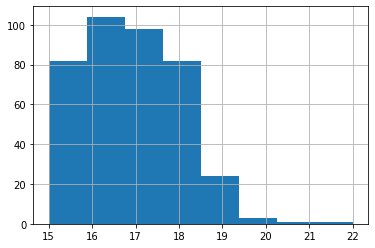

In [16]:
disc_data('age')

Большая часть учеников соответстует школьному возрасту, и лишь относительно небольшая часть учеников старше.

Среднее значение: 2.75, Медианное значение: 3.0, 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0, 


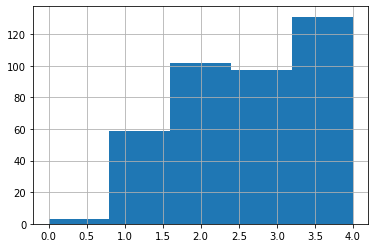

In [17]:
disc_data('Medu')

Среднее значение: 2.51, Медианное значение: 2.0, 25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0, 


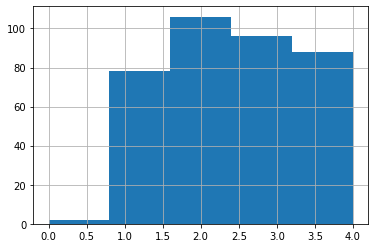

In [18]:
disc_data('Fedu')

Как видно из двух предыдущих графиков, в среднем уровень образования женщин-родителей учеников несколько выше, чем у мужчин.

Среднее значение: 1.44, Медианное значение: 1.0, 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, 


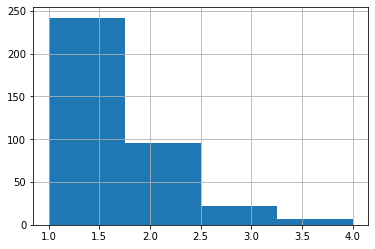

In [19]:
disc_data('traveltime')

Большая часть учеников достаточно быстро добирается до школы.

Среднее значение: 2.04, Медианное значение: 2.0, 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, 


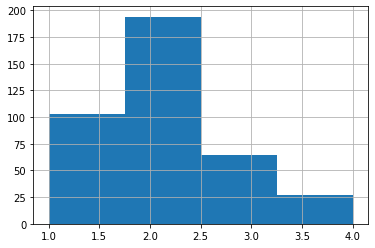

In [20]:
disc_data('studytime')

Меньше 25% учеников занимаются в неделю больше 5 часов.

Среднее значение: 0.34, Медианное значение: 0.0, 25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0, 


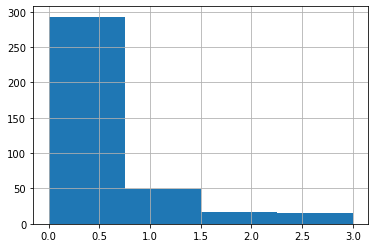

In [21]:
disc_data('failures')

Меньше 25% учеников имели какие-либо неудачи, не связанные со школьной деятельностью.

Среднее значение: 3.95, Медианное значение: 4.0, 25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0, 


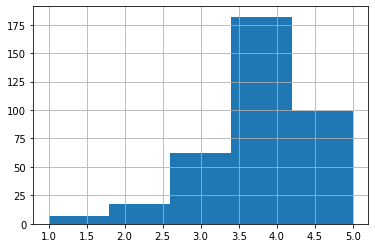

In [22]:
disc_data('famrel')

Среднее значение: 3.23, Медианное значение: 3.0, 25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0, 


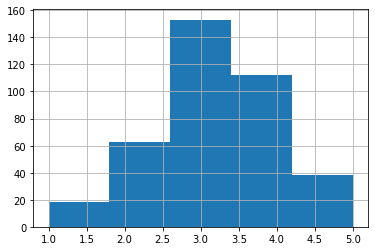

In [23]:
disc_data('freetime')

Среднее значение: 3.11, Медианное значение: 3.0, 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0, 


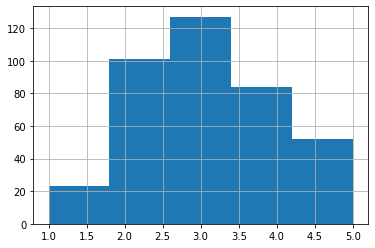

In [24]:
disc_data('goout')

Среднее значение: 3.53, Медианное значение: 4.0, 25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0, 


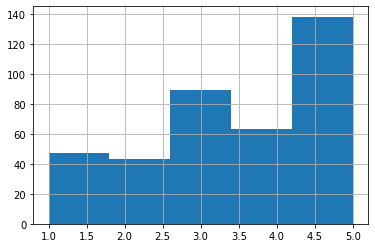

In [25]:
disc_data('health')

Скорее всего, опрашиваемые менее склонны к описанию своего состояния здоровья промежуточными значениями.

Распределение и количество значений строковых столбцов приведены на столбчатых диаграммах ниже:

<Figure size 432x288 with 0 Axes>

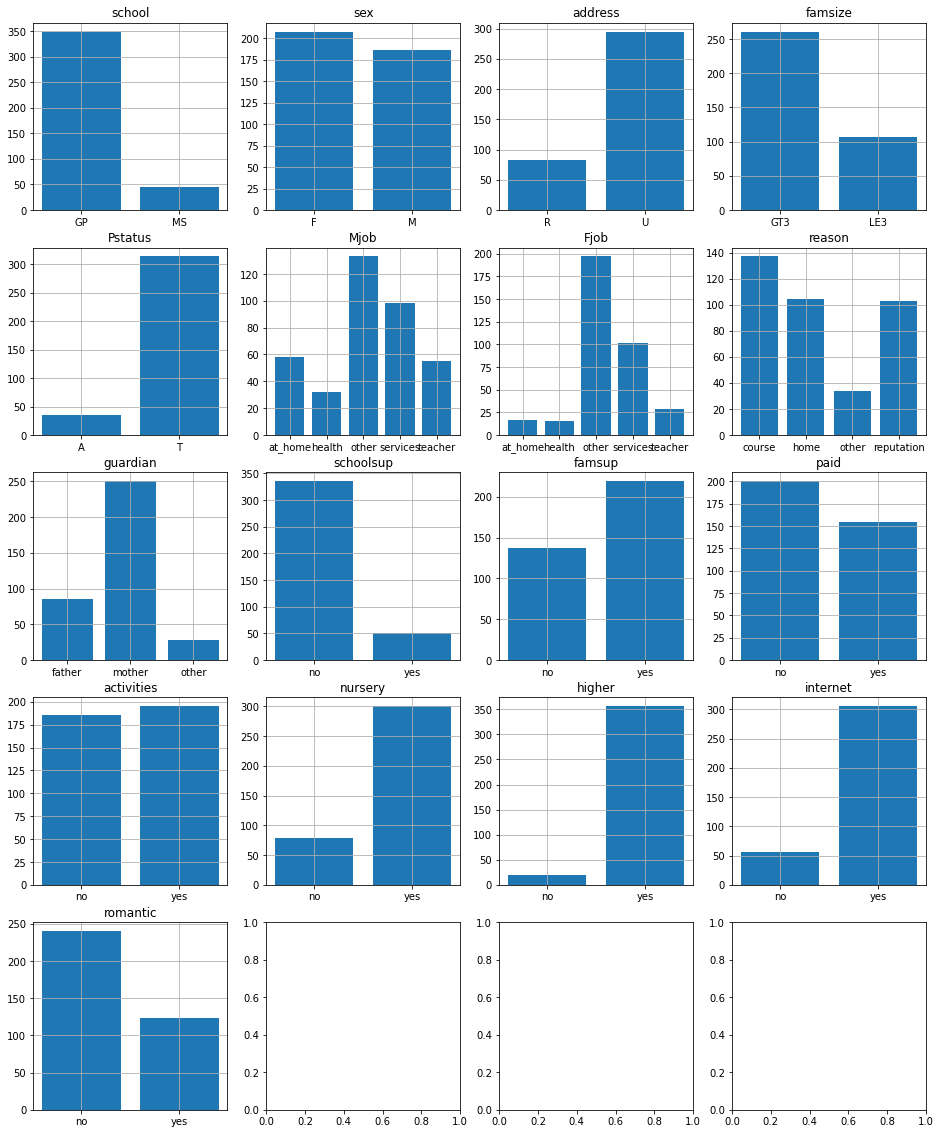

In [26]:
fig = plt.figure()
fig, axes = plt.subplots (5,4, figsize=(16,20))
i = 0
j = 0
for column in school.columns:
    if school[column].dtype == 'object':
        x = school.groupby(by=[column])[column].agg(['count']).reset_index()
        axes[i][j].bar(x[column],x['count'])
        axes[i][j].set_title(column)
        axes[i][j].grid()
        j += 1
        if j >= 4:
            i += 1
            j = 0



### Корреляционный анализ

<AxesSubplot:>

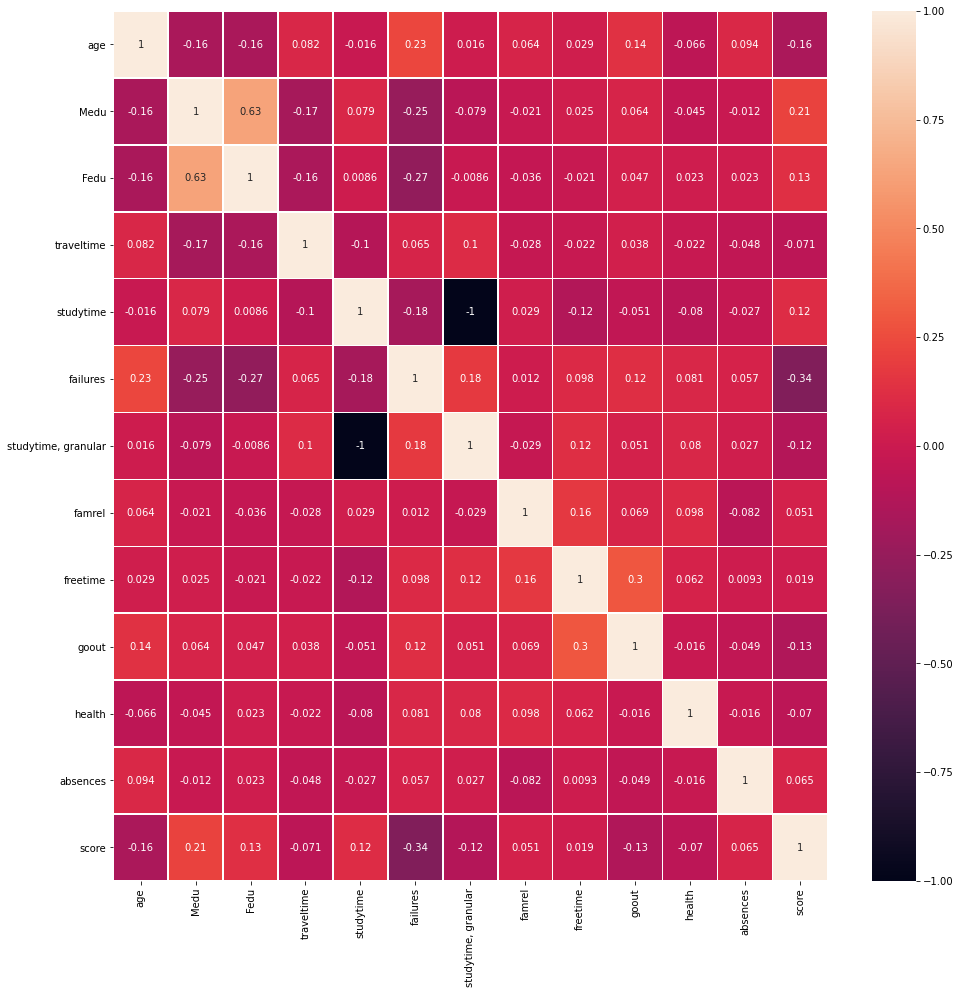

In [27]:
fig_2, ax_2 = plt.subplots(figsize=(16,16))         # Sample figsize in inches
sns.heatmap(school.corr(), annot=True, linewidths=.5, ax=ax_2)

Как мы видим, уже на данном этапе можно выделить несколько интересных зависимостей. Оставим только те из них, абсолютное значение коэффициента корреляции которых с баллом на гос.экзамене больше 0.10:

<AxesSubplot:>

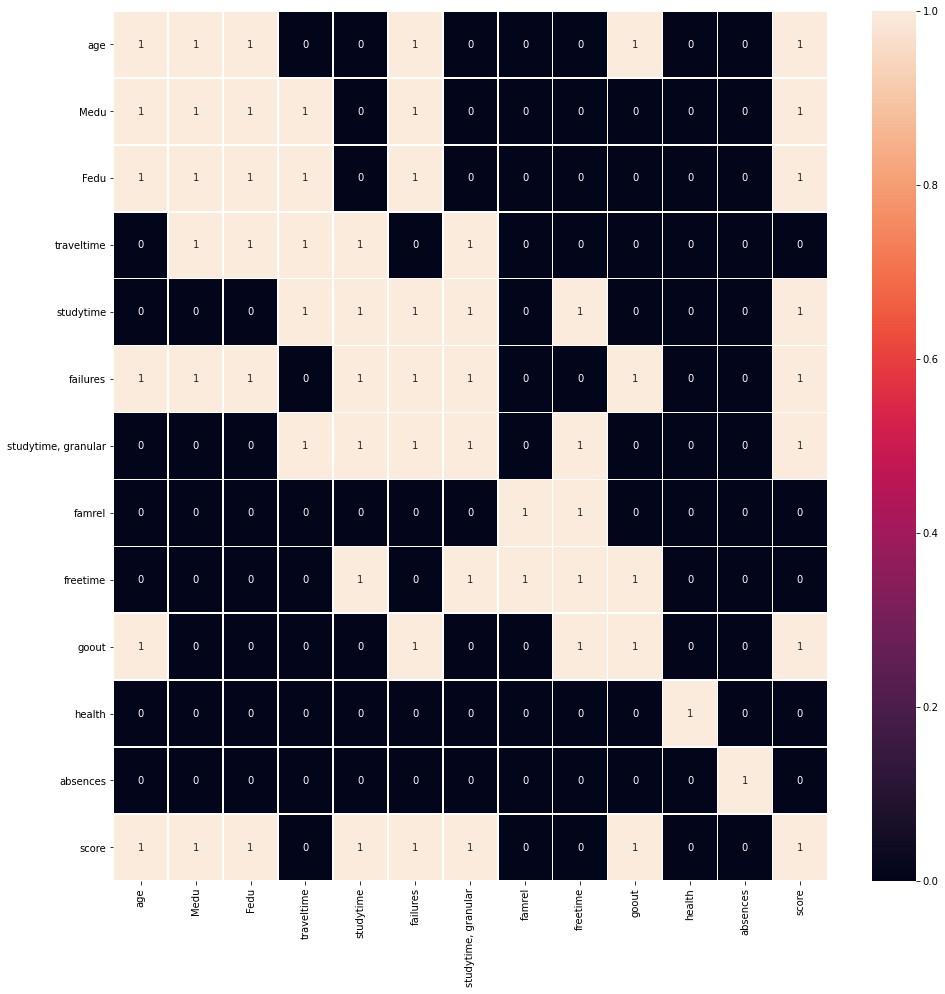

In [28]:
fig_2, ax_2 = plt.subplots(figsize=(16,16))  
sns.heatmap(round(abs(school.corr())+0.4), annot=True, linewidths=.5, ax=ax_2)

Таким образом, можно считать, что финальный балл ученика по математике коррелирует со следующими количественными параметрами:
Положительно:

    -С уровнем образования родителей Medu, Fedu, причем коэффициент корреляции образования матери выше, чем коэффициент корреляции образования отца
    -С количеством еженедельных занятий studytime
Отрицательно:

    -С количеством его внеучебных неудач failures
    -С возрастом ученика age
    -С тем, насколько часто ученик проводит время с друзьями (что грустно) goout
    
Итог по корреляционному анализу: для построения модели выберем столбцы failures, Medu, age, Fedu, goout, studytime
(в порядке убывания абсолютного значения соответствующего коэффициента матрицы корреляции)

### Анализ номинативных переменных 

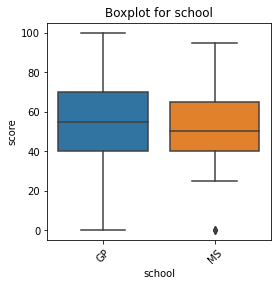

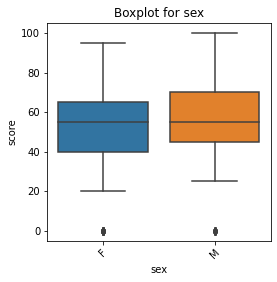

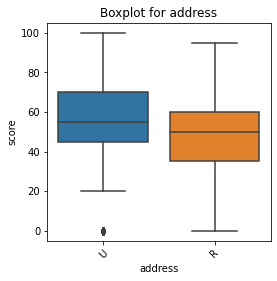

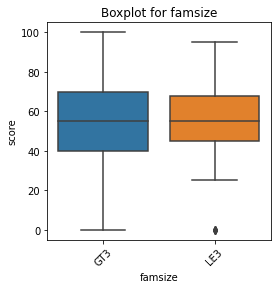

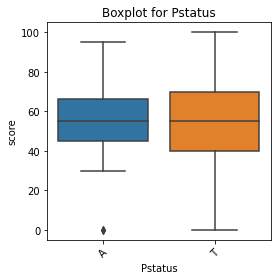

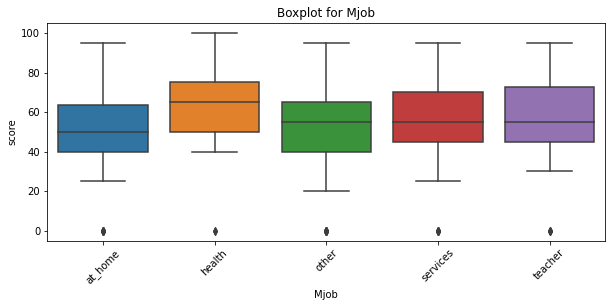

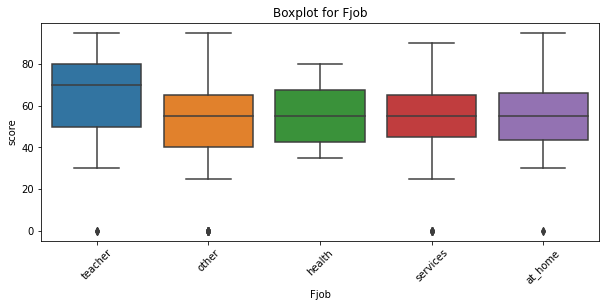

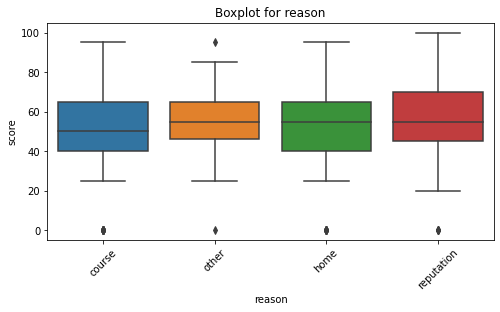

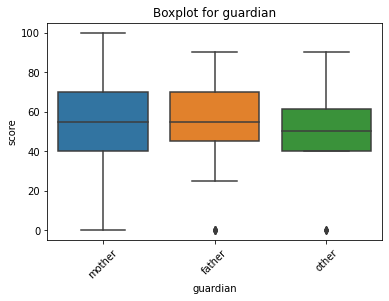

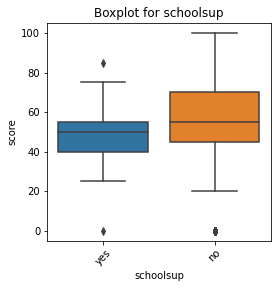

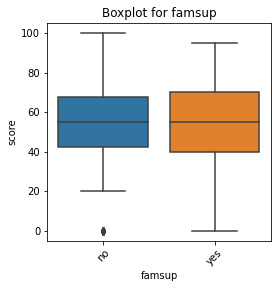

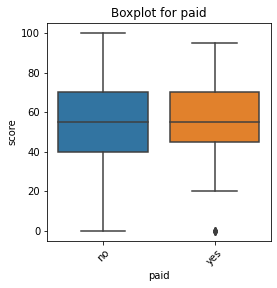

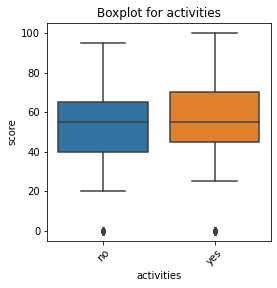

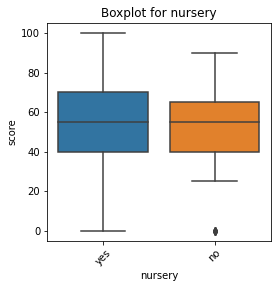

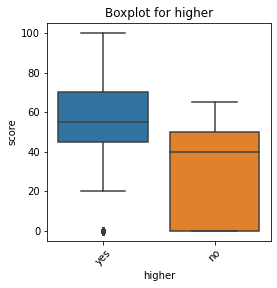

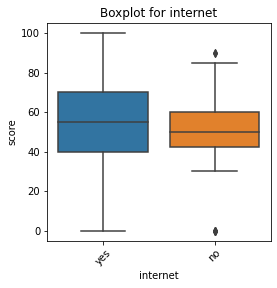

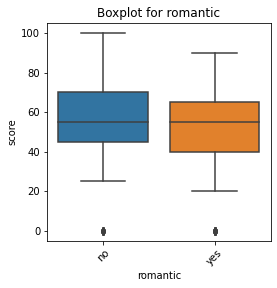

In [29]:
for column in school.columns:
    if school[column].dtype == 'object':
        get_boxplot(column)

Оценим статистическую значимость различий по каждому столбцу:

In [30]:
for column in school.columns:
    if school[column].dtype == 'object':
        get_stat_dif(column)

Найдены статистически значимые различия для колонки Mjob


Таким образом, из номинативных переменных статистически значимым является влияние работы отца Mjob.

### Вывод

1. Представленные данные содержат относительно небольшое количество пустых элементов (не более 15% в худшем случае), являются достаточно чистыми и почти не содержат выбросов или неправильных значений.

2. Финальный балл ученика по математике коррелирует со следующими количественными параметрами:
Положительно:

    Medu, Fedu, studytime
    
Отрицательно:

    failures, age, goout
    
Итог по корреляционному анализу: для построения модели выберем столбцы failures, Medu, age, Fedu, goout, studytime
(в порядке убывания абсолютного значения соответствующего коэффициента матрицы корреляции)

3. Финальный балл ученика по математике проявляет статистически значимые различия в зависимости от места работы отца Fjob.

4. Для дальнейшего формирования модели предлагается использовать следующие параметры:
    
    -failures
    -Medu, Fedu, Fjob
    -age
    -goout
    -studytime/studytime,granular